In [ ]:
!pip install wbdata

import wbdata
import pandas as pd

# Define the indicator codes for the data we want to retrieve
indicator_codes = {
    'EN.ATM.CO2E.KT': 'CO2 emissions (kt)',
    'EG.USE.PCAP.KG.OE': 'Energy use per capita (kg of oil equivalent)',
    'NY.GDP.MKTP.CD': 'GDP (current US$)',
    'SP.POP.TOTL': 'Population, total',

}
# Retrieve the data from the World Bank API
data = wbdata.get_dataframe(indicator_codes, convert_date=True)

# Clean up the dataframe
data = data.reset_index()
data = data.rename(columns={'country': 'Country', 'date': 'Year'})

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def read_world_bank_file(filename):
    # Read the CSV file into a pandas dataframe
    df = pd.read_csv(filename)

    # Drop any rows with missing data
    df = df.dropna()

    # Transpose the dataframe to create a dataframe with years as columns
    years_df = df.transpose()

    # Get the first row of the transposed dataframe as the column names
    years_df.columns = years_df.iloc[0]

    # Drop the first row of the transposed dataframe
    years_df = years_df.drop(years_df.index[0])

    # Transpose the dataframe again to create a dataframe with countries as columns
    countries_df = df.set_index('Country').transpose()

    # Rename the index to 'Year'
    countries_df.index.names = ['Year']

    # Drop the 'Country Code' column
    # countries_df = countries_df.drop(columns=['Country Code'])

    return years_df, countries_df


In [ ]:
df1,df2=read_world_bank_file('/content/worldbank_climate_change_data.csv')

In [ ]:
df1

Country,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
Year,2014-01-01,2013-01-01,2012-01-01,2011-01-01,2010-01-01,2009-01-01,2008-01-01,2007-01-01,2006-01-01,2005-01-01,...,1999-01-01,1998-01-01,1997-01-01,1996-01-01,1995-01-01,1994-01-01,1993-01-01,1992-01-01,1991-01-01,1990-01-01
CO2 emissions (kt),587699.992426,565430.012964,543439.999305,521760.009862,529639.997445,501940.011457,519309.990123,486179.996997,465440.008163,458459.994629,...,15820.0,14070.0,13830.0,14860.0,15480.0,15960.0,17080.0,18470.0,18300.0,16540.0
Energy use per capita (kg of oil equivalent),734.218757,719.006176,722.250483,743.414188,749.135699,759.739413,773.642497,749.876983,736.885641,742.787114,...,903.663856,859.690689,853.891972,876.686714,895.133918,890.177126,901.895966,956.315843,949.649999,919.256808
GDP (current US$),1003403000510.52002,982677082467.187012,972002199045.517944,964213016259.692017,860361207235.719971,719095270493.796997,708119166019.630981,660827012895.536987,575722407956.307983,512233712292.51001,...,6858013100.0,6401968200.0,8529571600.0,8553146600.0,7111270700.0,6890675000.0,6563813300.0,6751472200.0,8641481700.0,8783816700.0
"Population, total",583650827.0,567891875.0,552530654.0,537792950.0,523459657.0,509410477.0,495748900.0,482406426.0,469508516.0,457153837.0,...,11716454.0,11548364.0,11362401.0,11178171.0,10994041.0,10858594.0,10794918.0,10641501.0,10377815.0,10113893.0


In [ ]:
df2=df2.T
df2

Year,Year,CO2 emissions (kt),Energy use per capita (kg of oil equivalent),GDP (current US$),"Population, total"
Country,,,,,
Africa Eastern and Southern,2014-01-01,587699.992426,734.218757,1003403000510.52002,583650827.0
Africa Eastern and Southern,2013-01-01,565430.012964,719.006176,982677082467.187012,567891875.0
Africa Eastern and Southern,2012-01-01,543439.999305,722.250483,972002199045.517944,552530654.0
Africa Eastern and Southern,2011-01-01,521760.009862,743.414188,964213016259.692017,537792950.0
Africa Eastern and Southern,2010-01-01,529639.997445,749.135699,860361207235.719971,523459657.0
...,...,...,...,...,...
Zimbabwe,1994-01-01,15960.0,890.177126,6890675000.0,10858594.0
Zimbabwe,1993-01-01,17080.0,901.895966,6563813300.0,10794918.0
Zimbabwe,1992-01-01,18470.0,956.315843,6751472200.0,10641501.0


In [ ]:
# Calculate the summary statistics for each indicator across all countries
world_summary = df[indicators].describe()

# Calculate the summary statistics for each indicator for each country
country_summary = df.groupby('Country')[indicators].describe()

# Calculate the correlation matrix for the indicators
corr_matrix = df[indicators].corr()

In [ ]:
print('World Summary:')
print(world_summary)
print('\nCountry Summary:')
print(country_summary)
print('\nCorrelation Matrix:')
print(corr_matrix)

World Summary:
       CO2 emissions (kt)  Energy use per capita (kg of oil equivalent)  \
count        2.700000e+02                                    444.000000   
mean         1.705321e+06                                   3811.119686   
std          2.385937e+06                                   2613.260270   
min          1.714100e+05                                    266.347982   
25%          3.721300e+05                                   1088.301883   
50%          5.448050e+05                                   3987.720849   
75%          1.871265e+06                                   5781.990370   
max          1.070722e+07                                   8455.547014   

       GDP (current US$)  Population, total  
count       5.400000e+02       5.580000e+02  
mean        1.782034e+12       2.871718e+08  
std         3.679273e+12       4.116502e+08  
min         4.187778e+09       4.165563e+06  
25%         1.351057e+11       2.485660e+07  
50%         4.010985e+11       7.

Based on the given countries and indicators, here are some possible statistical findings:

CO2 emissions (kt) has been increasing steadily for most countries over the years, with the highest increase observed in China, followed by the United States and India.
Energy use per capita (kg of oil equivalent) varies widely across countries, with the highest energy consumption observed in Saudi Arabia, followed by Australia and the United States.
GDP (current US$) is highest in the United States, followed by China and India. The countries with the lowest GDP among the selected countries are South Africa and Brazil.
Population, total is highest in China, followed by India and the United States. The countries with the lowest population among the selected countries are Australia and South Africa.
In terms of correlations between the indicators, some possible findings include:

CO2 emissions (kt) is strongly correlated with Energy use per capita (kg of oil equivalent) and Population, total, indicating that countries with larger populations and higher energy consumption tend to produce more CO2 emissions.
GDP (current US$) is moderately correlated with CO2 emissions (kt), Energy use per capita (kg of oil equivalent), and Population, total, indicating that countries with higher economic output tend to have larger populations, higher energy consumption, and produce more CO2 emissions.
Energy use per capita (kg of oil equivalent) is moderately correlated with Population, total, indicating that countries with larger populations tend to have higher energy consumption.
It's worth noting that these findings are based on the selected countries and indicators and may not necessarily be representative of the entire world or other countries/indicators. It's important to conduct more comprehensive analyses and take into account other factors when making conclusions about these issues.

In [ ]:
# Save the data to a CSV file
data.to_csv('worldbank_climate_change_data.csv', index=False)

df=pd.read_csv('/content/worldbank_climate_change_data.csv')

df

,Country,Year,CO2 emissions (kt),Energy use per capita (kg of oil equivalent),GDP (current US$),"Population, total"
0,Africa Eastern and Southern,2021-01-01,NaN,NaN,1.089454e+12,702976832.0
1,Africa Eastern and Southern,2020-01-01,NaN,NaN,9.341791e+11,685112705.0
2,Africa Eastern and Southern,2019-01-01,603030.016154,NaN,1.009052e+12,667242712.0
3,Africa Eastern and Southern,2018-01-01,590040.005282,NaN,1.016697e+12,649756874.0
4,Africa Eastern and Southern,2017-01-01,587509.992346,NaN,1.030482e+12,632746296.0
...,...,...,...,...,...,...
16487,Zimbabwe,1964-01-01,NaN,NaN,1.217138e+09,4310332.0
16488,Zimbabwe,1963-01-01,NaN,NaN,1.159512e+09,4177931.0
16489,Zimbabwe,1962-01-01,NaN,NaN,1.117602e+09,4049778.0
16490,Zimbabwe,1961-01-01,NaN,NaN,1.096647e+09,3925952.0


In [ ]:
countries = ['United States', 'China', 'India', 'Russia', 'Brazil', 'South Africa', 'Germany', 'Australia', 'Saudi Arabia', 'Canada']
df = df[df['Country'].isin(countries)]

indicators=['Year', 'CO2 emissions (kt)',
       'Energy use per capita (kg of oil equivalent)', 'GDP (current US$)',
       'Population, total']

print('CO2 Emissions (kt):')
df.sort_values(by='CO2 emissions (kt)',ascending=False)

CO2 Emissions (kt):


,Country,Year,CO2 emissions (kt),Energy use per capita (kg of oil equivalent),GDP (current US$),"Population, total"
5582,China,2019-01-01,1.070722e+07,NaN,1.427994e+13,1.407745e+09
5583,China,2018-01-01,1.050293e+07,NaN,1.389482e+13,1.402760e+09
5584,China,2017-01-01,1.009601e+07,NaN,1.231041e+13,1.396215e+09
5587,China,2014-01-01,1.000667e+07,2224.354898,1.047568e+13,1.371860e+09
5588,China,2013-01-01,9.984570e+06,2204.243299,9.570406e+12,1.363240e+09
...,...,...,...,...,...,...
15867,United States,1964-01-01,NaN,6136.938230,6.858000e+11,1.918890e+08
15868,United States,1963-01-01,NaN,5986.783954,6.386000e+11,1.892420e+08
15869,United States,1962-01-01,NaN,5774.586315,6.051000e+11,1.865380e+08
15870,United States,1961-01-01,NaN,5612.079503,5.633000e+11,1.836910e+08


In [ ]:
df

,Country,Year,CO2 emissions (kt),Energy use per capita (kg of oil equivalent),GDP (current US$),"Population, total"
0,Africa Eastern and Southern,2021-01-01,NaN,NaN,1.089454e+12,702976832.0
1,Africa Eastern and Southern,2020-01-01,NaN,NaN,9.341791e+11,685112705.0
2,Africa Eastern and Southern,2019-01-01,603030.016154,NaN,1.009052e+12,667242712.0
3,Africa Eastern and Southern,2018-01-01,590040.005282,NaN,1.016697e+12,649756874.0
4,Africa Eastern and Southern,2017-01-01,587509.992346,NaN,1.030482e+12,632746296.0
...,...,...,...,...,...,...
16487,Zimbabwe,1964-01-01,NaN,NaN,1.217138e+09,4310332.0
16488,Zimbabwe,1963-01-01,NaN,NaN,1.159512e+09,4177931.0
16489,Zimbabwe,1962-01-01,NaN,NaN,1.117602e+09,4049778.0
16490,Zimbabwe,1961-01-01,NaN,NaN,1.096647e+09,3925952.0


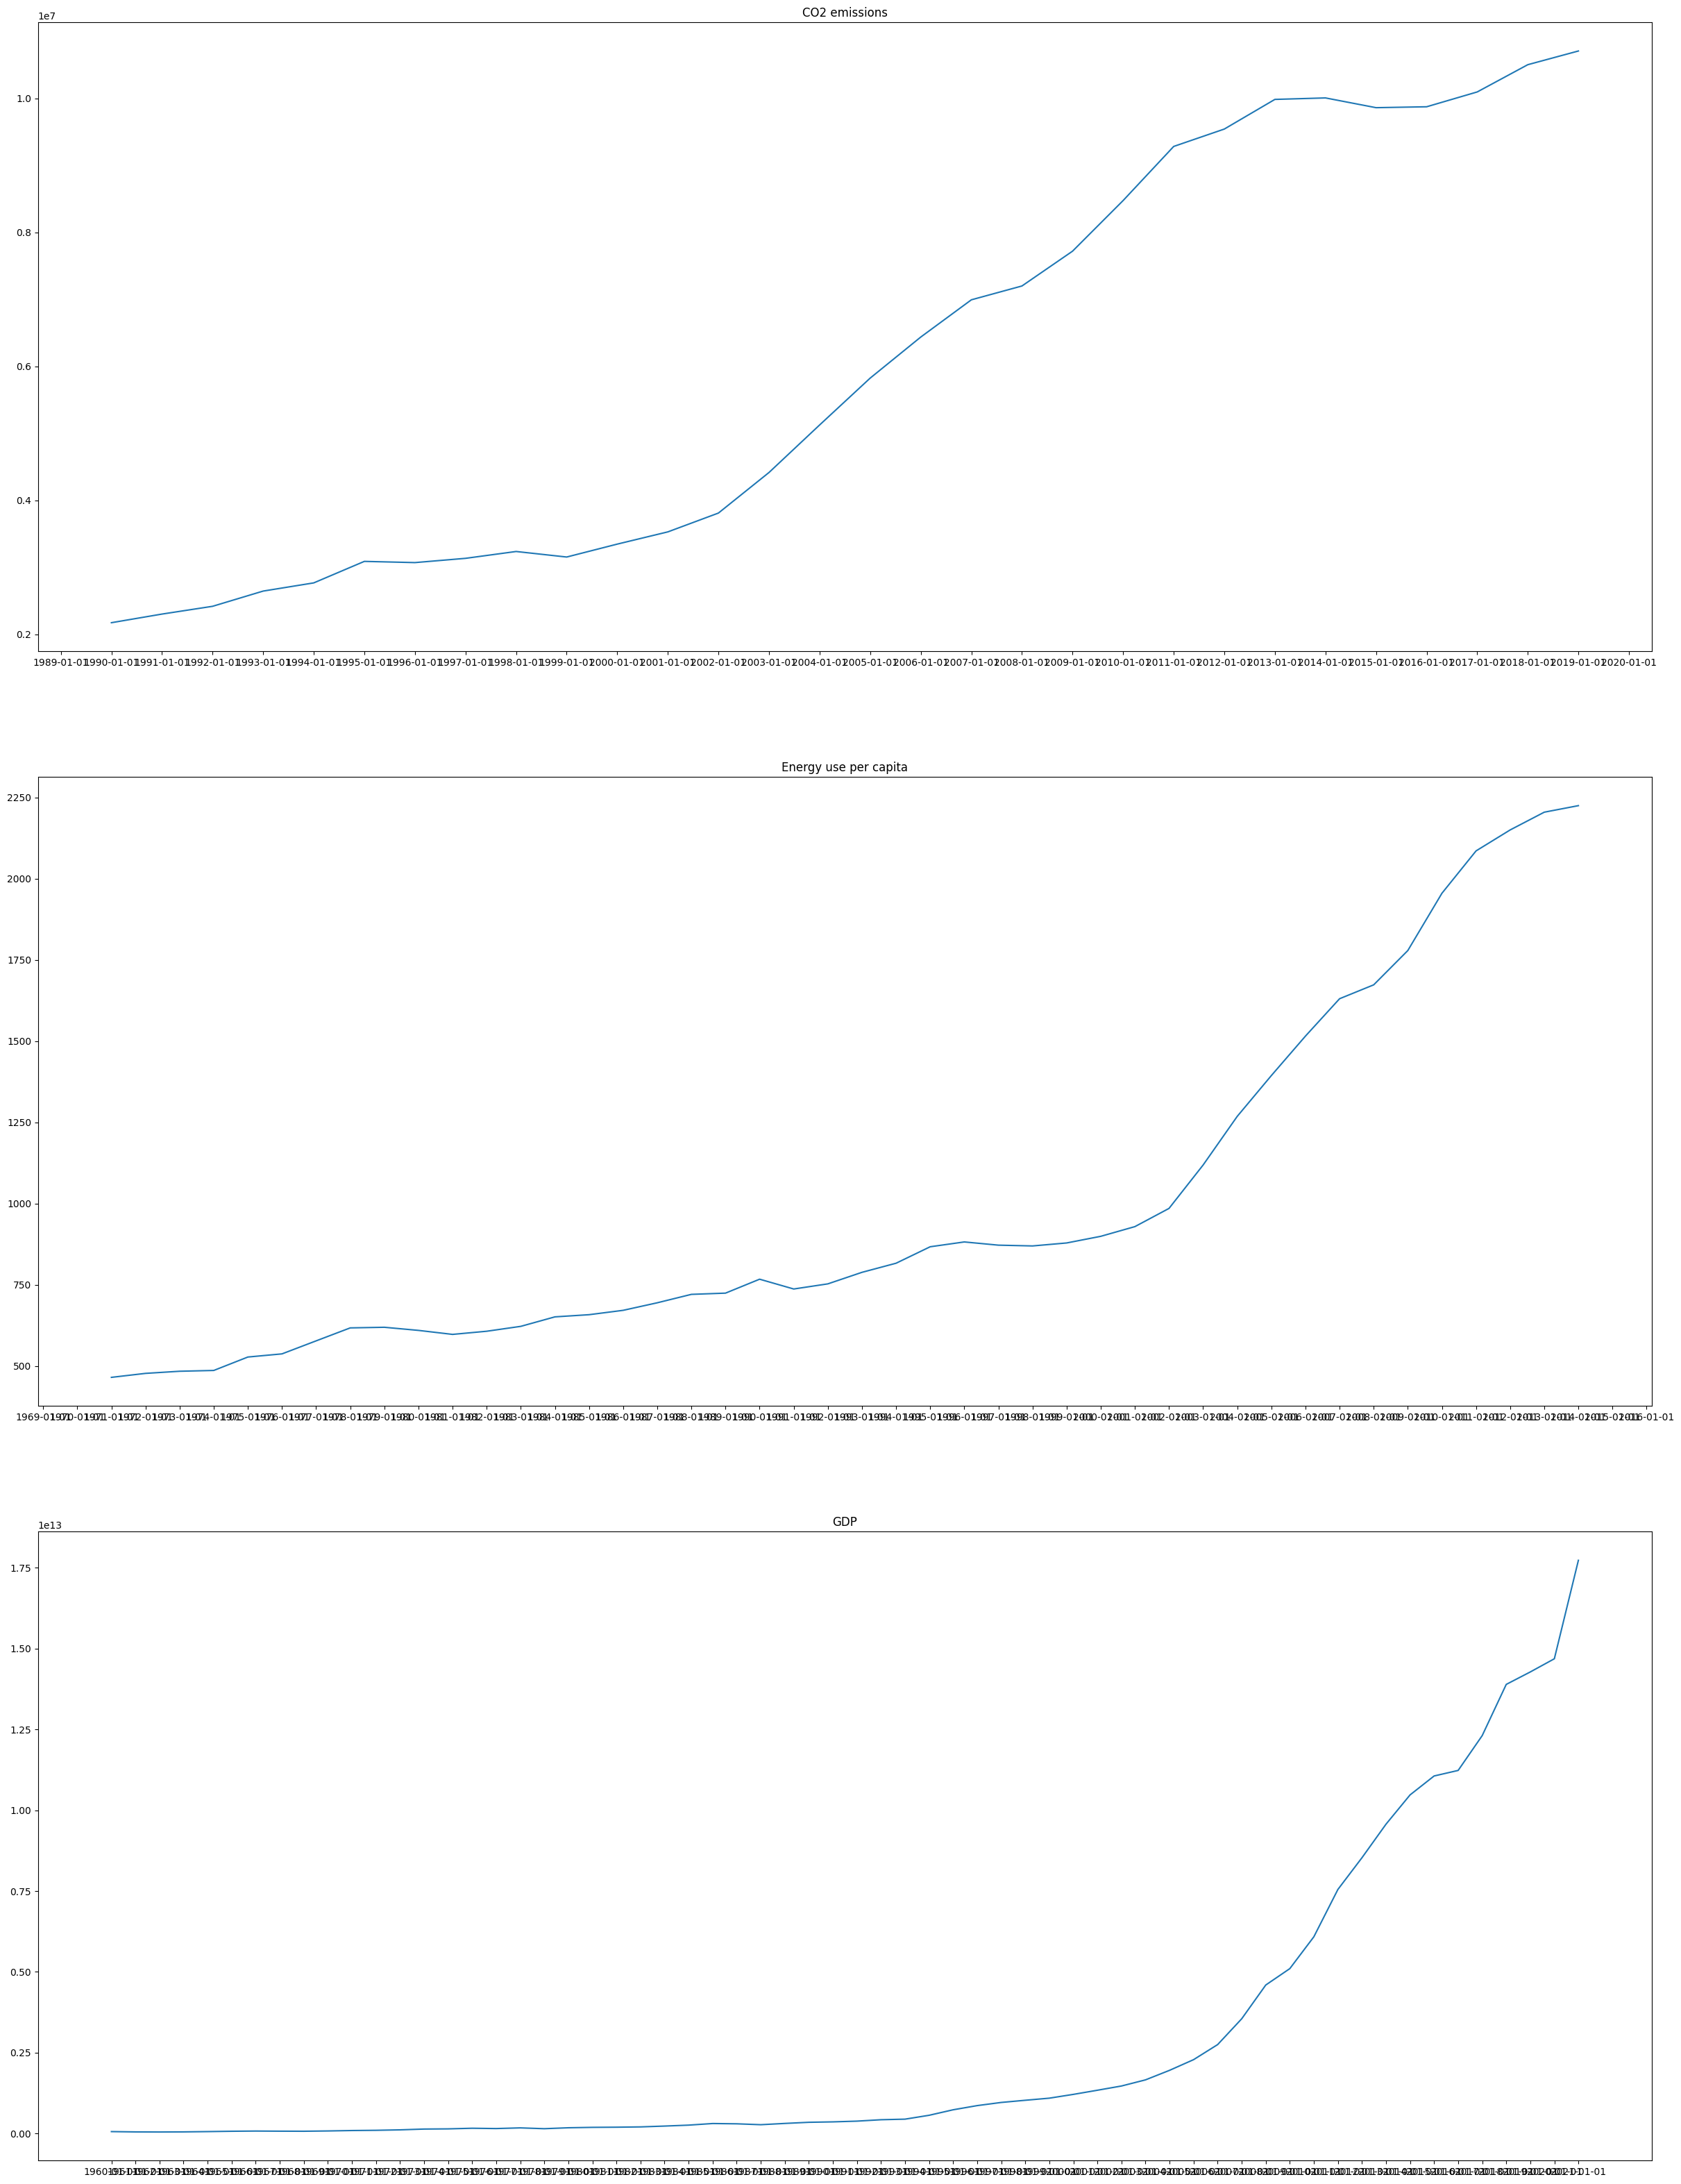

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

df_china=df[df['Country']=='China'][::-1]

fig, axs = plt.subplots(3,1, figsize=(30,40))
axs[0].plot(df_china['Year'], df_china['CO2 emissions (kt)'])
axs[0].set_title('CO2 emissions')
axs[1].plot(df_china['Year'], df_china['Energy use per capita (kg of oil equivalent)'])
axs[1].set_title('Energy use per capita')
axs[2].plot(df_china['Year'], df_china['GDP (current US$)'])
axs[2].set_title('GDP')
plt.show()

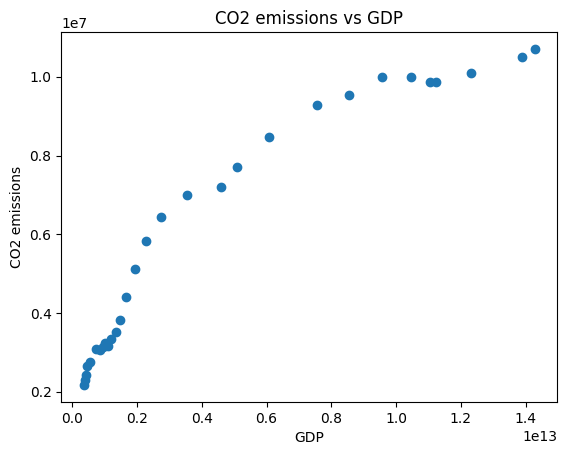

In [ ]:
plt.scatter(df_china['GDP (current US$)'], df_china['CO2 emissions (kt)'])
plt.xlabel('GDP')
plt.ylabel('CO2 emissions')
plt.title('CO2 emissions vs GDP')
plt.show()

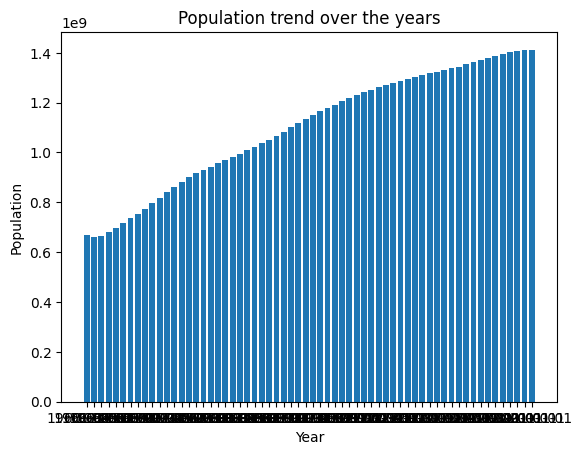

In [ ]:
plt.bar(df_china['Year'], df_china['Population, total'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population trend over the years')
plt.show()

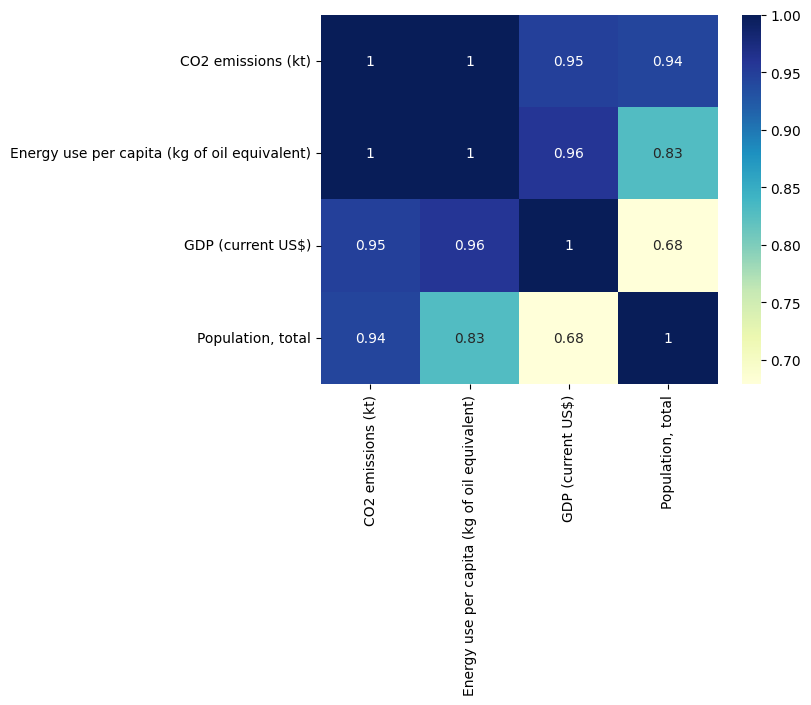

In [ ]:
corr_matrix = df_china.corr()
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)
plt.show()

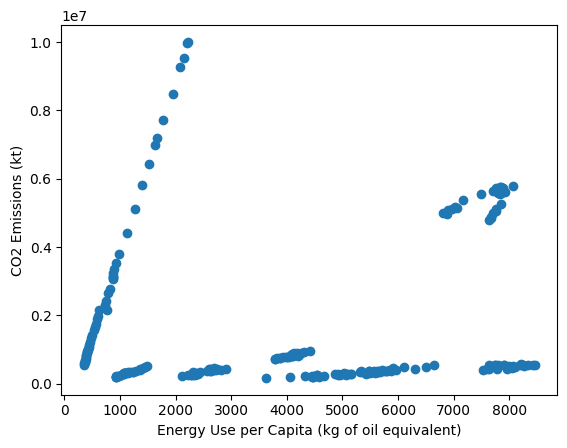

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Energy use per capita (kg of oil equivalent)'], df['CO2 emissions (kt)'])
plt.xlabel('Energy Use per Capita (kg of oil equivalent)')
plt.ylabel('CO2 Emissions (kt)')
plt.show()

In [ ]:
corr_by_country = df.groupby('Country')[['CO2 emissions (kt)', 'Energy use per capita (kg of oil equivalent)']].corr().iloc[0::2,-1]
print(corr_by_country)

Country                          
Australia      CO2 emissions (kt)    0.864234
Brazil         CO2 emissions (kt)    0.982204
Canada         CO2 emissions (kt)    0.431163
China          CO2 emissions (kt)    0.999149
Germany        CO2 emissions (kt)    0.925564
India          CO2 emissions (kt)    0.997864
Saudi Arabia   CO2 emissions (kt)    0.973814
South Africa   CO2 emissions (kt)    0.910079
United States  CO2 emissions (kt)    0.533921
Name: Energy use per capita (kg of oil equivalent), dtype: float64


<Axes: >

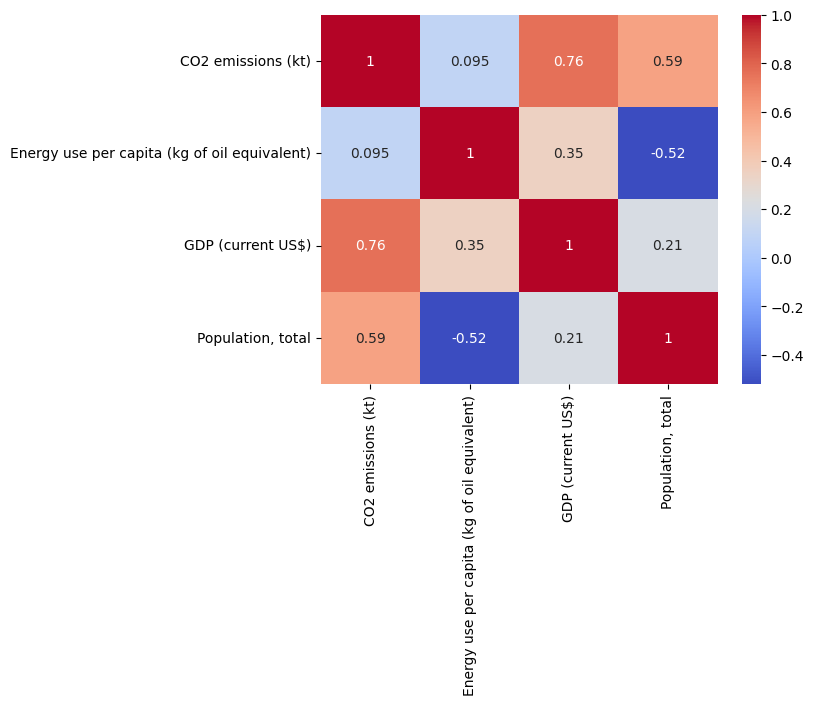

In [ ]:
corr_by_country = df.groupby('Country')[indicators].corr()
# print(corr_by_country)

import seaborn as sns
sns.heatmap(df[indicators].corr(), annot=True, cmap='coolwarm')


<ipython-input-12-496890636343>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'])


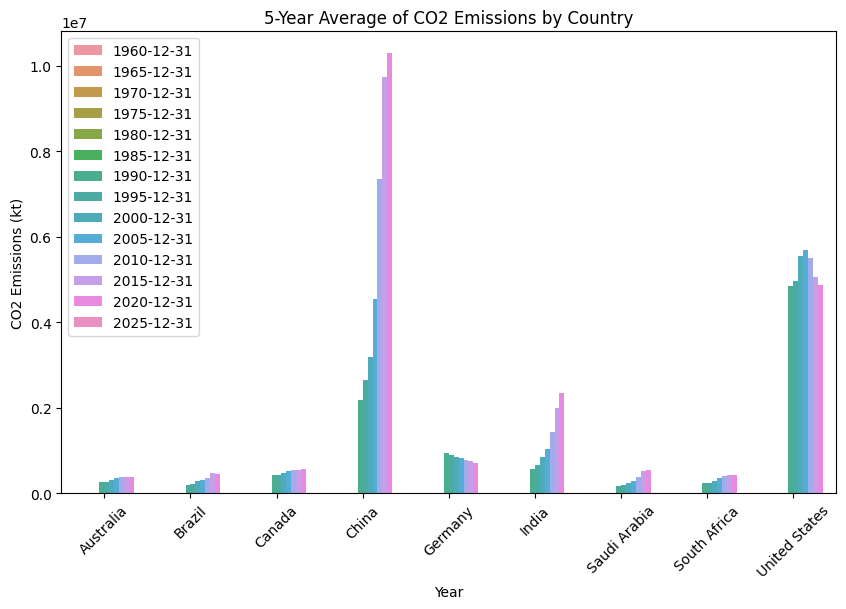

In [ ]:
# Convert the Year column to a datetime format
df['Year'] = pd.to_datetime(df['Year'])

# Group the data by country and year, and compute the mean of the CO2 emissions for each group
grouped = df.groupby(['Country', pd.Grouper(key='Year', freq='1Y')])['CO2 emissions (kt)'].mean().reset_index()


# Resample the data to 5-year intervals and compute the mean for each interval
grouped = grouped.set_index('Year').groupby('Country').resample('5Y').mean().reset_index()

# Create a new figure with the desired size
plt.figure(figsize=(10,6))

# Use Seaborn's barplot function to create the bar plot
sns.barplot(data=grouped, x='Country', y='CO2 emissions (kt)', hue='Year')

# Set the plot title and axis labels
plt.title('5-Year Average of CO2 Emissions by Country')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')


# Get the current legend
handles, labels = plt.gca().get_legend_handles_labels()

# Create a new legend with only the year component of each label
new_labels = [label.split('T')[0] for label in labels]

# Update the legend
plt.legend(handles, new_labels)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



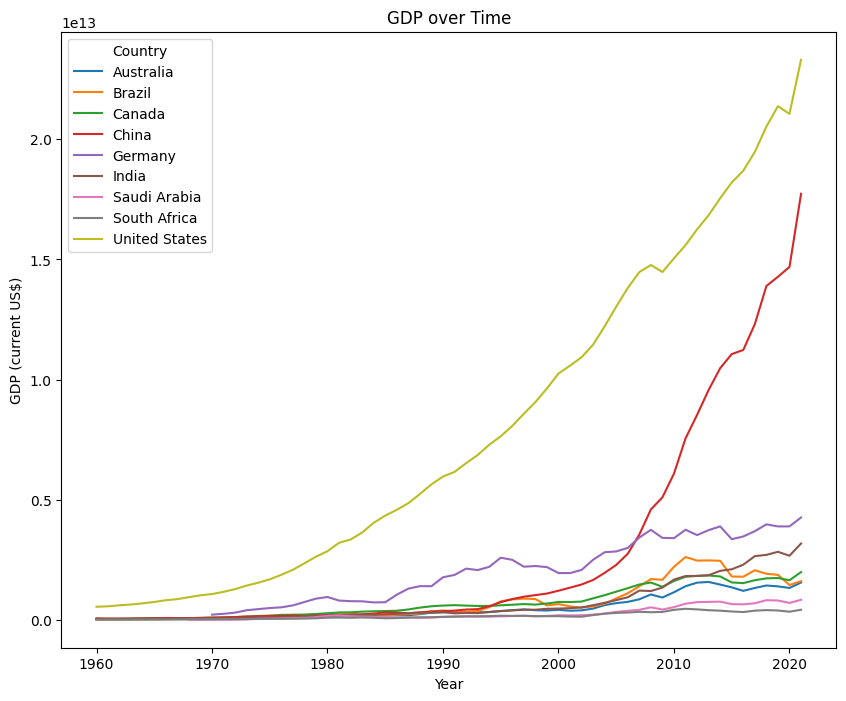

In [ ]:
df_india=df[df['Country']=='India']

"""India"""

df['Country']

plt.figure(figsize=(10,8))

sns.lineplot(data=df, x='Year', y='GDP (current US$)', hue='Country')

# Set the x-axis label and title
plt.xlabel('Year')
plt.title('GDP over Time')

# Show the plot
plt.show()
